# 따릉이 데이터를 활용한 데이터 분석
- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요.

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
train = pd.read_csv('Data/train.csv') 
test = pd.read_csv('Data/test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
- hour_bef_windspeed : 1시간 전 풍속(평균)
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- hour_bef_ozone : 1시간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count : 시간에 따른 따릉이 대여 수

In [7]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [8]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [9]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [10]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [11]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [12]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [13]:
train[['hour','count']].groupby('hour').mean() #시간대별 따릉이대여수 평균

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [14]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)   # 결측치를 어떻게 메꾸느냐에 따라서 정확도가 달라질까?
# 결측치가 5~8%를 차지하는 train데이터의 열들을 제외하면?

In [118]:
pd.DataFrame.describe(train)
winter = (climate.hour_bef_temperature <=12) & (climate.hour_bef_temperature>=0)
climate_winter = climate.loc[winter,['hour','hour_bef_temperature','count']]
sf = (climate.hour_bef_temperature <=20.05) & (climate.hour_bef_temperature>=12)
climate_sf = climate.loc[sf,['hour','hour_bef_temperature','count']]
summer = (climate.hour_bef_temperature <=30) & (climate.hour_bef_temperature>=20.05)
climate_summer = climate.loc[summer,['hour','hour_bef_temperature','count']]

In [68]:
import matplotlib.pyplot as plt

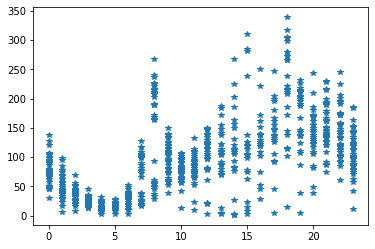

In [119]:
plt.plot('hour', 'count', '*', data = climate_sf)

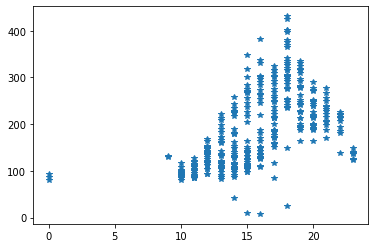

In [120]:
plt.plot('hour', 'count', '*', data = climate_summer)

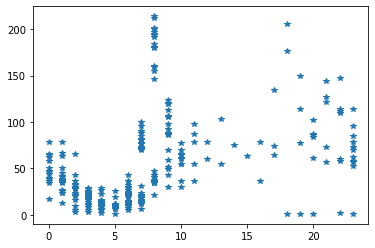

In [121]:
plt.plot('hour', 'count', '*', data = climate_winter)

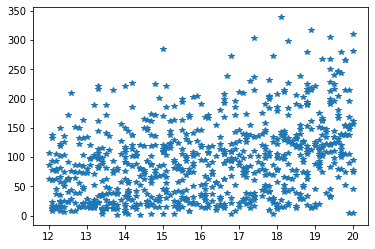

In [122]:
plt.plot('hour_bef_temperature', 'count', '*', data = climate_sf)

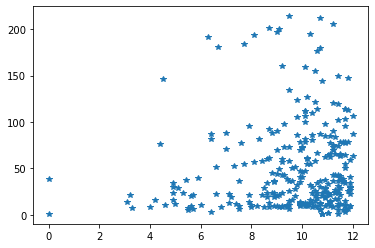

In [123]:
plt.plot('hour_bef_temperature', 'count', '*', data = climate_winter)

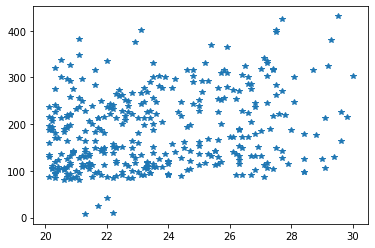

In [124]:
plt.plot('hour_bef_temperature', 'count', '*', data = climate_summer)

In [117]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
pred = model.predict(test)

In [15]:
submission = pd.read_csv('Data/submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [16]:
submission['count'] = pred

In [17]:
submission

,id,count
0,0,91.10
1,1,230.04
2,2,79.95
3,4,29.53
4,5,68.11
...,...,...
710,2148,54.71
711,2149,68.87
712,2165,121.63
713,2166,169.84


In [18]:
submission.to_csv('베이스라인.csv',index = False)